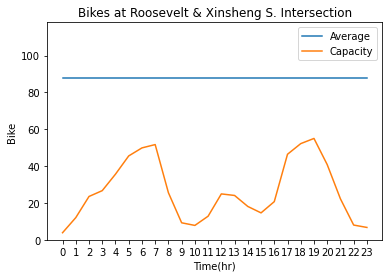

In [29]:
import matplotlib.pyplot as py
import csv, datetime

# open the file
f = open("ubike.csv", "r")
bike = {}
capacity = {}
count = {}

# processing the data
for row in csv.DictReader(f):
    if row["station"] == "Roosevelt & Xinsheng S. Intersection":
        time = datetime.datetime.strptime(row["time"], "%Y/%m/%d %H:%M")
        hour = time.hour
        if hour not in bike:
            bike[hour] = int(row["bike"])
            capacity[hour] = int(row["lot"])
            count[hour] = 1
        else:
            bike[hour] += int(row["bike"])
            capacity[hour] += int(row["lot"])
            count[hour] += 1 
f.close()

# preparing for plotting
time_seq = bike.keys()
time_seq = sorted(time_seq)
avg = []
lot = []
for k in time_seq:
    avg.append(float(bike[k]) / count[k])
    lot.append(float(capacity[k]) / count[k])
    
# plotting the data in avg and lot
py.plot(time_seq, lot, label = "Average")
py.plot(time_seq, avg, label = "Capacity")
py.title("Bikes at Roosevelt & Xinsheng S. Intersection")
py.legend(loc="upper right")
py.ylim(0, max(lot) + 30)
xt = []
for i in range(24):
    xt.append(i)
py.xticks(xt)
py.xlabel("Time(hr)")
py.ylabel("Bike")
py.show()

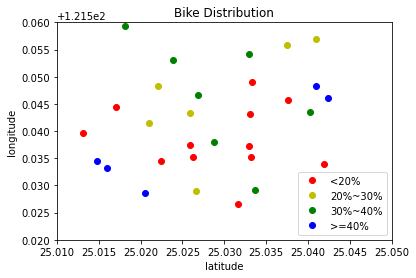

In [27]:
import csv, os, datetime 
import matplotlib.pyplot as py 

f = open("ubike.csv", "r")

station = {} 
count = {} 
lat = {} 
lon = {} 
capacity = {} 
for row in csv.DictReader(f):
    time = datetime.datetime.strptime(row["time"], "%Y/%m/%d %H:%M")
    time = time.hour
    if time == 17 or time == 18:
        id = int(row["id"])
        if id not in station:
            lat[id] = float(row["latitude"])
            lon[id] = float(row["longitude"])
            capacity[id] = int(row["lot"])
            station[id] = int(row["bike"])
            count[id] = 1
        else:
            station[id] += int(row["bike"])
            capacity[id] += int(row["lot"])
            count[id] += 1
f.close()

id_seq = station.keys()
id_seq = sorted(id_seq)
redlat = [] 
redlon = [] 
yellowlat = [] 
yellowlon = [] 
greenlat = [] 
greenlon = [] 
bluelat = [] 
bluelon = [] 

for k in id_seq:
    capacity[k] = float(capacity[k]) / count[k]
    station[k] = (float(station[k]) / count[k]) / capacity[k]
    if station[k] < 0.2:
        redlat.append(lat[k])
        redlon.append(lon[k])
    elif 0.2 <= station[k] < 0.3:
        yellowlat.append(lat[k])
        yellowlon.append(lon[k])
    elif 0.3 <= station[k] < 0.4:
        greenlat.append(lat[k])
        greenlon.append(lon[k])
    else:
        bluelat.append(lat[k])
        bluelon.append(lon[k])
        
py.xlabel("latitude")
py.ylabel("longitude")
py.title("Bike Distribution")
py.plot(redlat, redlon,"ro", label="<20%")
py.plot(yellowlat, yellowlon, "yo", label="20%~30%")
py.plot(greenlat, greenlon, "go", label="30%~40%")
py.plot(bluelat, bluelon, "bo", label=">=40%")
py.axis([25.01,25.05,121.52,121.56])
py.legend(loc = "lower right")
py.show()